<h1 dir="rtl" align="left">
Social Networks HW2 - University of Tehran - Fall 1404
</h1>


<div>
Name: Amir Hoseein Farazmand
<br/>
Student number : 810104221
</div>

# **Imports and Load Data**

In [1]:
import ranking_analysis as ra

G_wiki = ra.load_wiki_graph('./data/q2/Wiki-Vote.txt')
print(f"Wiki-Vote Graph Loaded: {len(G_wiki.nodes())} nodes, {len(G_wiki.edges())} edges.")

Wiki-Vote Graph Loaded: 7115 nodes, 103689 edges.


# **a1.Calculation and Mapping**

Computing HITS Authority Scores...
Computing PageRank Scores (alpha=0.85)...
Ranking calculation complete.


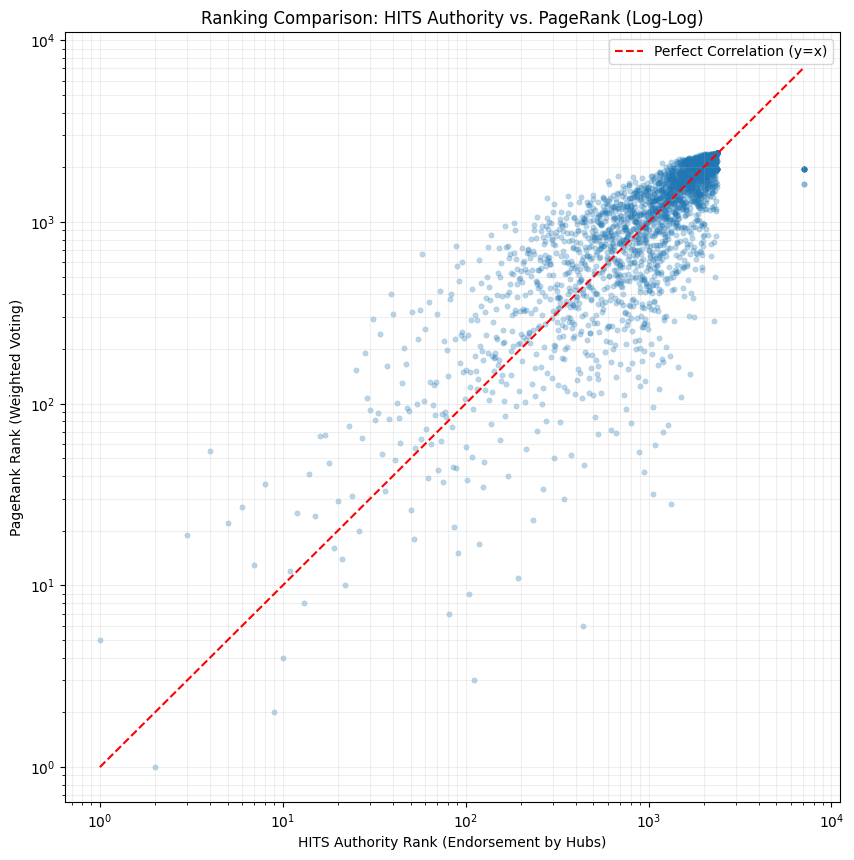

In [2]:
rank_df = ra.compute_rankings_comparison(G_wiki)
print("Ranking calculation complete.")

ra.plot_rank_divergence(rank_df)

# **a2.Divergence Analysis**

In [3]:
hits_better, pr_better = ra.identify_divergent_nodes(rank_df, top_n=5)

print("Nodes favored by HITS (Good Authority Rank, Bad PageRank)")
print(hits_better[['id', 'HITS_Rank', 'PageRank_Rank']].to_string(index=False))

print("\nNodes favored by PageRank (Good PageRank, Bad Authority Rank)")
print(pr_better[['id', 'HITS_Rank', 'PageRank_Rank']].to_string(index=False))

print("\nTop 10 HITS Authorities")
print(rank_df.sort_values('HITS_Rank').head(10)[['id', 'HITS_Rank', 'PageRank_Rank']].to_string(index=False))

print("\nTop 10 PageRank")
print(rank_df.sort_values('PageRank_Rank').head(10)[['id', 'PageRank_Rank', 'HITS_Rank']].to_string(index=False))

Nodes favored by HITS (Good Authority Rank, Bad PageRank)
  id  HITS_Rank  PageRank_Rank
5132        684           1790
1733        600           1683
5637        279           1347
2605        364           1393
4482        607           1621

Nodes favored by PageRank (Good PageRank, Bad Authority Rank)
  id  HITS_Rank  PageRank_Rank
7033       7115           1623
8076       7113           1623
4541       7114           1954
5414       7112           1954
6090       7111           1954

Top 10 HITS Authorities
  id  HITS_Rank  PageRank_Rank
2398          1              5
4037          2              1
3352          3             19
1549          4             55
 762          5             22
3089          6             27
1297          7             13
2565          8             36
  15          9              2
2625         10              4

Top 10 PageRank
  id  PageRank_Rank  HITS_Rank
4037              1          2
  15              2          9
6634              3        111


<div dir="rtl">

در این بخش، تفاوت‌های ساختاری بین دو متدولوژی بنیادین رتبه‌بندی روی شبکه رأی‌دهی ویکی‌پدیا (`Wiki-Vote`) بررسی شد: الگوریتم **HITS** و الگوریتم **PageRank** (که بر اساس اصل رأی‌گیری وزن‌دار و جریان اعتبار عمل می‌کند).

### ۱. محاسبات و نگاشت (Calculation and Mapping)
هر دو الگوریتم روی گراف اجرا شدند و امتیازات خام به رتبه (Rank) تبدیل شدند. نمودار پراکندگی با مقیاس Log-Log برای مقایسه رتبه Authority (محور افقی) و رتبه PageRank (محور عمودی) ترسیم شد.

* **مشاهده کلی:** همانطور که در نمودار مشخص است، اکثر گره‌ها حول خط قطری ($y=x$) تجمع یافته‌اند که نشان‌دهنده همبستگی کلی بین این دو معیار است. به عبارتی، کسانی که مدیریت شایسته ویکی‌پدیا محسوب می‌شوند، معمولاً در هر دو الگوریتم جایگاه مناسبی دارند.
* **انحرافات (Deviations):** با این حال، نقاطی وجود دارند که به شدت از این خط فاصله گرفته‌اند. این نقاط نشان‌دهنده تفاوت فلسفی بین «تأیید شدن توسط فعالان» (HITS) و «جریان اعتبار توزیع‌شده» (PageRank) است.

### ۲. تحلیل واگرایی (Divergence Analysis)
با بررسی جداول خروجی، دو گروه متمایز از نودها که رفتار متضادی در دو الگوریتم دارند، شناسایی و تحلیل شدند:

#### گروه اول: محبوب‌های HITS (رتبه Authority خوب، رتبه PageRank بد)
این نودها در **زیر خط مورب** نمودار قرار می‌گیرند.
* **نمونه‌ها:** نودهای `5637` (HITS: ۲۷۹ | PageRank: ۱۳۴۷) و `5132`.
* **تحلیل ساختاری:**
    * الگوریتم HITS به گره‌هایی پاداش می‌دهد که توسط **Hubهای قوی** (کاربرانی که زیاد رأی می‌دهند) تأیید شده باشند.
    * **علت تفاوت:** این افراد توسط تعداد کمی از کاربران "بسیار فعال" (Super-Voters) حمایت شده‌اند. از نظر HITS، چون رأی‌دهندگان این افراد "هاب‌های معتبر" هستند، اعتبار زیادی منتقل می‌کنند. اما از نظر PageRank، کاربری که به صدها نفر رأی داده، قدرت رأی‌اش تقسیم می‌شود (Dilution Effect). بنابراین، این نودها سهم ناچیزی از PageRank دریافت می‌کنند و رتبه آن‌ها نسبت به HITS افت می‌کند.

#### گروه دوم: محبوب‌های پیج‌رنک (رتبه PageRank خوب، رتبه Authority بد)
این نودها در **بالای خط مورب** نمودار قرار می‌گیرند.
* **نمونه‌ها:** نودهای `7467` و `7033` (HITS: ~۷۱۰۰ | PageRank: ~۱۶۰۰).
* **تحلیل ساختاری:**
    * مشاهده می‌کنیم که رتبه HITS این افراد در قعر جدول است، یعنی تقریباً هیچ Hub معتبری به آن‌ها رأی نداده است.
    * **علت تفاوت:** این افراد احتمالاً رأی‌های خود را از "کاربران کم‌کار" یا "تک‌رأی" دریافت کرده‌اند.
        * **از دید HITS:** کاربری که فقط ۱ رأی داده، هاب نیست (امتیاز Hub نزدیک به صفر)؛ پس رأی او در الگوریتم HITS بی‌ارزش است.
        * **از دید PageRank:** کاربری که فقط ۱ رأی داده، تمامِ وزنِ اعتبار خود را بدون تقسیم شدن (No Dilution) به همین یک نفر منتقل می‌کند. بنابراین، داشتن حامیان "کم‌کار ولی متمرکز"، رتبه PageRank را بهبود می‌بخشد اما در HITS تأثیری ندارد.

### ۳. همگرایی در رأس هرم (Top-Tier Convergence)
با مقایسه جداول ۱۰ نفر برتر، مشاهده می‌شود که افراد اصلی شبکه در هر دو لیست حضور دارند:
* **اشتراکات:** نودهای `4037`، `2398` و `2625` در هر دو لیست جزو ۵ نفر اول هستند.
* **تفسیر:** این همگرایی نشان می‌دهد که "مدیران برتر" واقعی در ویکی‌پدیا، دارای هر دو ویژگی هستند: هم توسط Hubهای فعال حمایت می‌شوند (تعداد رأی بالا از افراد فعال) و هم توسط بدنه عمومی کاربران مورد تایید هستند (تنوع در منابع رأی).

</div>

# **b1.Simulation**

Running PageRank sensitivity analysis for alphas: [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
Selected 16 nodes for trajectory analysis.


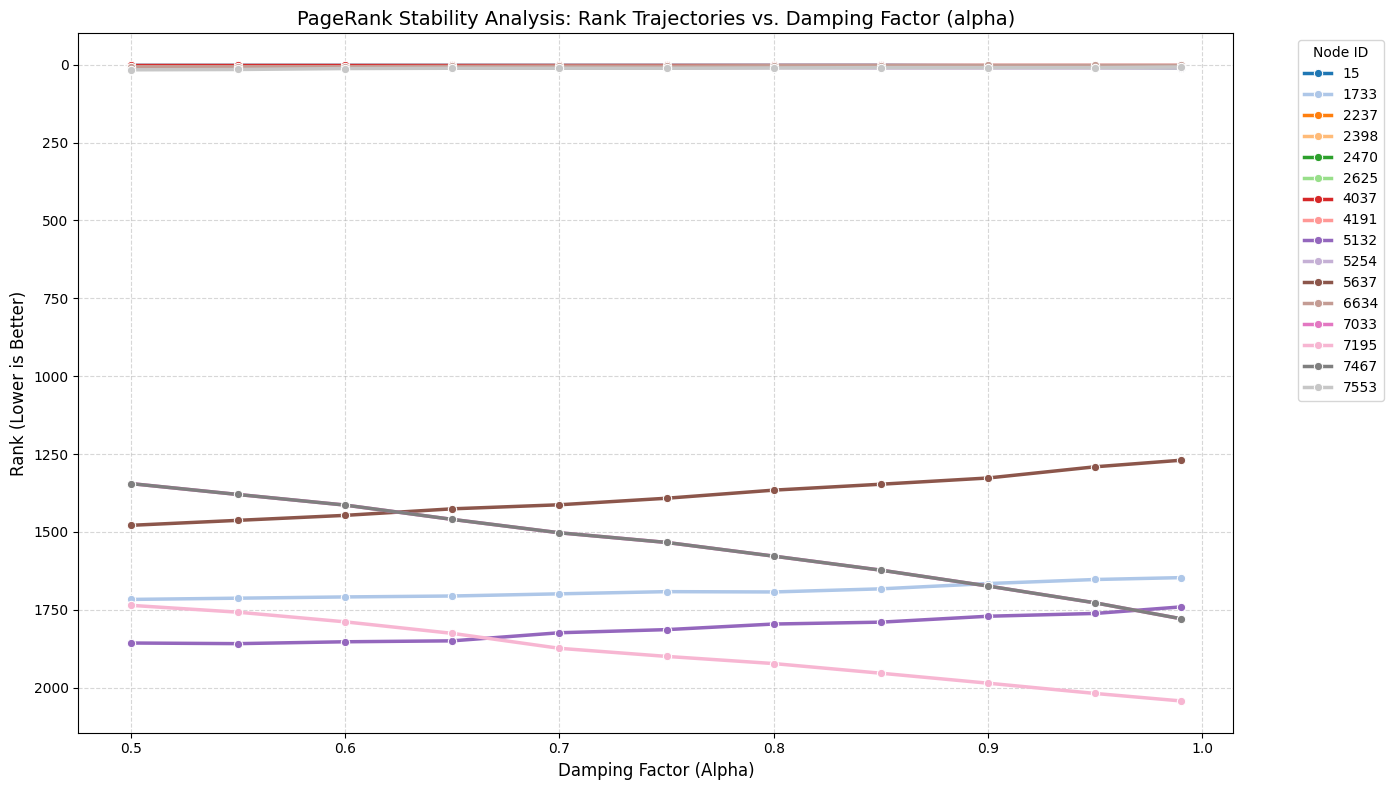


Rank Shifts for Selected Nodes
  id  Alpha_0.50  Alpha_0.55  Alpha_0.60  Alpha_0.65  Alpha_0.70  Alpha_0.75  Alpha_0.80  Alpha_0.85  Alpha_0.90  Alpha_0.95  Alpha_0.99
4037           1           1           1           1           1           1           1           1           1           1           1
  15           2           2           2           2           2           2           2           2           3           3           3
6634           6           6           6           5           4           4           3           3           2           2           2
2625           4           4           3           3           3           3           4           4           4           4           4
2398           8           8           8           7           7           7           7           5           5           5           5
2470           3           3           4           4           5           5           5           6           7           8           9
2237     

In [8]:
alpha_df = ra.analyze_alpha_sensitivity(G_wiki)

top_10_ids = alpha_df.sort_values('Alpha_0.85').head(10)['id'].tolist()

hits_favorites = [5132, 1733, 5637] 
pr_favorites = [7467, 7033, 7195]

nodes_to_plot = list(set(top_10_ids + hits_favorites + pr_favorites))

print(f"Selected {len(nodes_to_plot)} nodes for trajectory analysis.")
ra.plot_rank_trajectories(alpha_df, nodes_to_plot)

cols = ['id', 'Alpha_0.50','Alpha_0.55','Alpha_0.60','Alpha_0.65','Alpha_0.70','Alpha_0.75', 'Alpha_0.80', 'Alpha_0.85','Alpha_0.90','Alpha_0.95','Alpha_0.99']
print("\nRank Shifts for Selected Nodes")
print(alpha_df[alpha_df['id'].isin(nodes_to_plot)][cols].sort_values('Alpha_0.85').to_string(index=False))

<div dir="rtl">

### ۱. شبیه‌سازی (Simulation)
تحلیل حساسیت انجام شد و مسیر حرکت رتبه برای ۱۰ گره برتر و همچنین ناهنجاری‌های شناسایی شده در بخش قبل (محبوب‌های HITS و PageRank) در نمودار خطی ترسیم گردید.

### ۲. تفسیر مسیرها (Trajectory Interpretation)
با تحلیل نمودار و جدول داده‌ها، سه الگوی رفتاری متمایز مشاهده می‌شود:

#### الف) بازیگران پایدار (Stable Actors)
* **نودهای نمونه:** `4037` (رتبه ۱ ثابت) و `15` (رتبه ۲ ثابت).
* **توصیف:** خط نمودار این افراد کاملاً افقی است و با تغییر $\alpha$ هیچ نوسانی ندارد.
* **تفسیر:** این افراد **«ابر قدرت‌های شبکه»** هستند. نفوذ آن‌ها هم محلی است (تعداد رأی زیاد) و هم جهانی (در قلب شبکه قرار دارند). چه کاربر تصادفی زود بپرد (رفتار محلی) و چه عمیق جستجو کند (رفتار جهانی)، همیشه گذرش به این افراد می‌افتد.

#### ب) صعودکنندگان جهانی (Improving / Global Influence)
* **نودهای نمونه:** `5637` (بهبود از ۱۴۷۹ به ۱۲۷۰) و `7553` (بهبود از ۱۶ به ۷).
* **توصیف:** با افزایش $\alpha$ (افزایش صبر کاربر)، رتبه این افراد بهبود می‌یابد (عدد رتبه کوچکتر می‌شود).
* **تفسیر:** این افراد دارای **«نفوذ ساختاری عمیق»** هستند. شاید تعداد لینک ورودی مستقیم آن‌ها (لایک مستقیم) کمتر باشد، اما در مسیرهای مهم شبکه قرار دارند. وقتی کاربر تصادفی صبورتر می‌شود ($\alpha \to 0.99$) و لینک‌ها را تا عمق زیاد دنبال می‌کند، احتمال اینکه نهایتاً به این گره‌ها برسد بیشتر می‌شود. نفوذ آن‌ها در سراسر گراف توزیع شده است.

#### ج) نزول‌کنندگان محلی (Declining / Local Influence)
* **نودهای نمونه:** `7033` و `7467` (افت شدید از ۱۳۴۵ به ۱۷۷۹).
* **توصیف:** با افزایش $\alpha$، رتبه این افراد بدتر می‌شود (سیر صعودی در نمودار، چون محور Y معکوس نیست ولی عدد رتبه زیاد می‌شود).
* **تفسیر:** این افراد دارای **«نفوذ صرفاً محلی»** هستند. همانطور که در بخش قبل دیدیم، این‌ها کسانی هستند که شاید فقط ۱ رأی از یک فرد خاص گرفته‌اند.
    * در $\alpha$ پایین (۰.۵۰): کاربر زود می‌پرد، پس همان ۱ لینک مستقیم ارزش زیادی دارد.
    * در $\alpha$ بالا (۰.۹۹): کاربر به گشت‌وجو ادامه می‌دهد. چون این نودها به بخش‌های دیگر شبکه متصل نیستند و در بن‌بست یا حاشیه قرار دارند، ترافیک از روی آن‌ها عبور نمی‌کند و اعتبارشان در مقیاس جهانی رنگ می‌بازد.

### نتیجه‌گیری نهایی
تحلیل پایداری نشان داد که PageRank با $\alpha$ بالا، به نودهایی پاداش می‌دهد که **«دسترس‌پذیری سراسری»** دارند، در حالی که PageRank با $\alpha$ پایین (و همچنین الگوریتم HITS)، بیشتر به نودهایی با **«محبوبیت آنی و مستقیم»** بها می‌دهد.

</div>